<a href="https://colab.research.google.com/github/POOJITHA1334/ML/blob/main/algorithm/PCA_iris_and_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
x = StandardScaler().fit_transform(iris.data)

In [ ]:
#create a pca that will return 95% of variance
pca = PCA(n_components=0.95,whiten=True)#whiten==scaling

In [ ]:
x_pca = pca.fit_transform(x)

In [ ]:
print('original number of features',x.shape[1])
print('reduced number of features',x_pca.shape[1])

original number of features 4
reduced number of features 2


In [ ]:
x[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [ ]:
x_pca[0:5]

array([[-1.32123186,  0.50041748],
       [-1.21403663, -0.70276984],
       [-1.37929566, -0.35643181],
       [-1.34146506, -0.62277102],
       [-1.39423839,  0.67431207]])

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

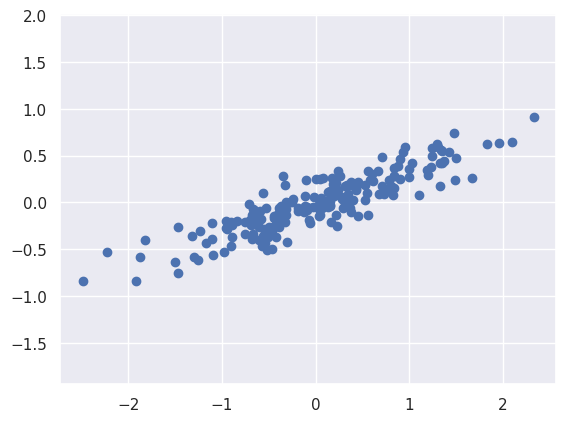

In [ ]:

r = np.random.RandomState(1)
x =np.dot(r.rand(2,2),r.randn(2,200)).T
plt.scatter(x[:, 0],x[:, 1])
plt.axis('equal')


In [ ]:
#features are extracted in x_pca so for training we can use x_pca as x_train
pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


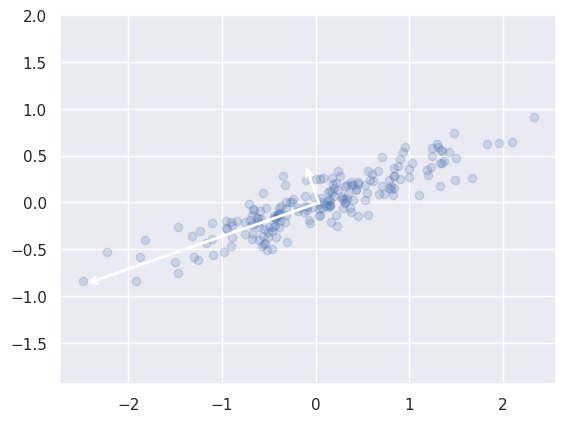

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


In [ ]:
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", x_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


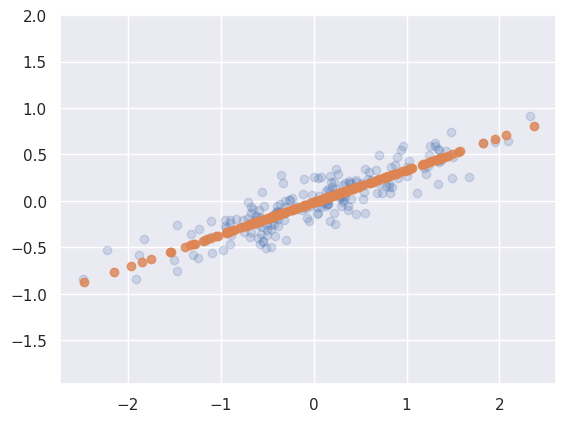

In [ ]:
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(x, y)
clf.score(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [ ]:
pca = PCA(n_components=0.95, whiten=True)
x_pca = pca.fit_transform(x)

In [ ]:
x_pca[0]

array([-1.30533786,  0.64836932])

In [ ]:
clf = LogisticRegression(random_state=0).fit(x_pca, y)
clf.score(x_pca, y)

0.9666666666666667